# Density Recover
## Kirill Zakharov
2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.integrate import quad
from scipy.fft import fft, ifft
from scipy.interpolate import interp1d
from functools import partial
from scipy.optimize import minimize, fsolve
import tqdm

%matplotlib inline

plt.style.use('ggplot')

## Fourier-Cosine Method

In [37]:
def COSDensity(cf, x, N, a, b):
    i = complex(0.0, 1.0)
    k = np.linspace(0, N-1, N)
    u = np.zeros([1,N])
    u = k * np.pi / (b-a)
        
    #F_k coefficients
    F_k    = 2.0 / (b - a) * np.real(cf(u) * np.exp(-i * u * a))
    F_k[0] = F_k[0] * 0.5; # adjustment for the first term
    
    #Final calculation
    f_X = np.matmul(F_k , np.cos(np.outer(u, x - a)))
        
    # we output only the first row
    return f_X

In [126]:
mu = 1
sigma = 2
i = complex(0.0, 1.0)
x = np.linspace(-10.0, 10, 1000)
f_XExact = stats.norm.pdf(x, mu, sigma)
N = 2**7
a = -10
b = 10

ChF = lambda u : np.exp(i * mu * u - 0.5 * sigma**2 * u**2)

In [127]:
COS_Density_Recover = COSDensity(ChF, x, N, a, b)

In [128]:
error_cos = abs(COS_Density_Recover[-1] - f_XExact[-1])

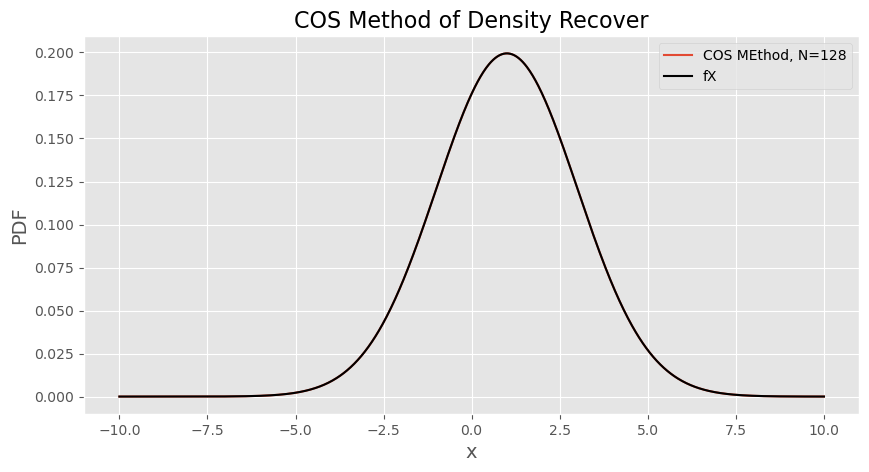

In [129]:
plt.subplots(figsize=(10, 5), dpi=100)
plt.plot(x, COS_Density_Recover, label=f'COS MEthod, N={N}')
plt.plot(x, f_XExact, label='fX', c='black')

plt.title('COS Method of Density Recover', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('PDF', fontsize=14)
plt.legend()
plt.show()

## Fast Fourier Transformation

In [130]:
def FFTDensity(cf, x, N):
    i = complex(0.0, 1.0)
    
    #grid for u
    u_max = 20.0
    du = u_max / N
    u = np.linspace(0, N-1, N) * du
    
    # grid for x
    b   = np.min(x)
    dx  = 2 * np.pi / (N * du)
    x_i = b + np.linspace(0, N-1, N) * dx
    
    phi = np.exp(-i*b*u) * cf(u)
    
    gamma_1 = np.exp(-i*x_i*u[0]) * cf(u[0])
    gamma_2 = np.exp(-i*x_i*u[-1]) * cf(u[-1])  
     
    f_xi = du/np.pi * np.real(fft(phi) - 0.5 * (gamma_1 + gamma_2))
    
    f_xiInterp = interp1d(x_i, f_xi, kind='cubic')   
    
    return f_xiInterp(x)

In [131]:
mu = 1
sigma = 2
i = complex(0.0, 1.0)
x = np.linspace(-10.0, 10, 1000)
f_XExact = stats.norm.pdf(x, mu, sigma)
N = 2**7

ChF = lambda u : np.exp(i * mu * u - 0.5 * sigma**2 * u**2)

In [132]:
fft_density_recover = FFTDensity(ChF, x, N)

In [133]:
error_fft = abs(fft_density_recover[-1] - f_XExact[-1])

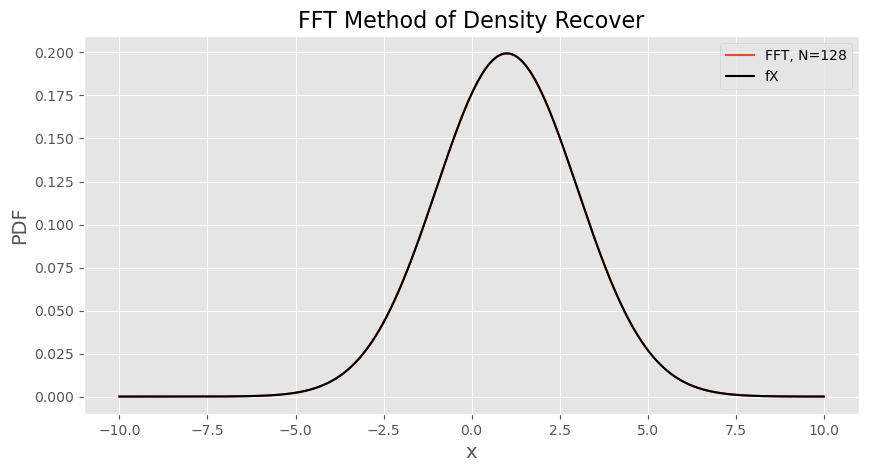

In [134]:
plt.subplots(figsize=(10, 5), dpi=100)
plt.plot(x, fft_density_recover, label=f'FFT, N={N}')
plt.plot(x, f_XExact, label='fX', c='black')

plt.title('FFT Method of Density Recover', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('PDF', fontsize=14)
plt.legend()
plt.show()

### Errors comparing

In [143]:
round(error_fft, 10)

3.3e-09

In [144]:
round(error_cos, 10)

7.9919e-06